In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import time
from numpy.random import normal
import numpy as np
from sklearn.linear_model import LinearRegression
import math

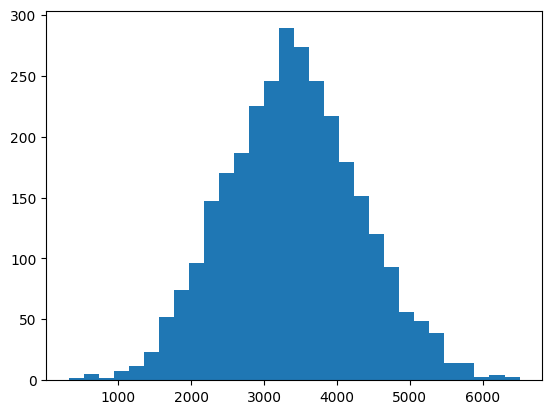

In [2]:
# Start with a normal distribution for the original floe sizes
# with mean = 3,400 meters...?
# size = 500

data = normal(loc=3400, scale=925, size=3000)

fsd = data.tolist()

count, bins, ignored = plt.hist(data, 30)
plt.show()


In [3]:
# Set Parameters For:
# 0. Fracture Rate
rfrac = .7
# 1. Weld Rate
rweld = .2
# 2. No event (1- (Weld+Fract))
rnone = .1

# Pick a random event to occurr based on the probability of
# Each happening

sampleList = [0, 1, 2]

# list of random events, where num is how many events to pick
def random_event(num):
    randomList = random.choices(
      sampleList, weights=(rnone, rfrac, rweld), k=num)
    return(randomList)

## Equal Probability Model

In [4]:
# add original normal distribution values to the dictionary

fsd_dict = {}

for value in fsd:
    if round(value) in fsd_dict:
        fsd_dict[round(value)] += 1
    else:
        fsd_dict[round(value)] = 1

# this value is for the weld loop
opt_out = 0

# THIS MODEL IS ASSUMING THE PROBABILITY OF CHOOSING A SIZE IS EQUAL 

events = random_event(8000)
for val in events:
    # define all the possible sizes
    keys = list(fsd_dict.keys())
    sizes =[]
    for item in keys:
        if fsd_dict[item] > 0:
            sizes.append(item)
    
    if val == 0:
        continue
    if val == 1:   # Fracture occurs
        # choose a place to break
        
        # Randomly chose a place to have a fracture
        # and Randomly choose how many it will break in to (4, 16?)

        choice = float(random.choice(sizes))
        options = [4,16]
        split = float(random.choice(options))
        if split == 4:    
            new_size = choice/2
        
        # remove 1 from the bigger value and add 4 to the broken value
            fsd_dict[choice] -= 1
            
            if new_size in fsd_dict:
                fsd_dict[new_size] += 4
            else:
                fsd_dict[new_size] = 4
                
        if split == 16:
            new_size = choice/4
            fsd_dict[choice] -= 1
            if new_size in fsd_dict:
                fsd_dict[new_size] += 16
            else:
                fsd_dict[new_size] = 16

    if val == 2:   # Weld occurs
        # choose a place to weld
        # OR Randomly choose a place to have a weld and randomly choose
        # how many pieces will weld together (4-16?)
        choice = float(random.choice(sizes))

            
        if fsd_dict[choice] < 4:
            # check and see how many there are in our choice
            choice_total = fsd_dict[choice]
            
            # see how many floes we need
            needed_floes = (4 - choice_total)
            
            for i in range(20):
                if opt_out == 1:
                    continue
                
                # check if a sligtly larger floe is available to weld 
                if (choice + i) in fsd_dict and fsd_dict[(choice + i)] > 0:
                    if fsd_dict[choice + i] >= needed_floes:
                        fsd_dict[choice + i] -= needed_floes
                        fsd_dict[choice] = 0
                        opt_out = 1
                    
                    # change the vals in the dictionary
                        if needed_floes >=3:
                            new_size = (choice + i)*2
                            if new_size in fsd_dict:
                                fsd_dict[new_size] += 4

                            else:
                                fsd_dict[new_size] = 4
                        else: 
                            new_size = (choice + i)+ choice
                            if new_size in fsd_dict:
                                fsd_dict[new_size] += 4

                            else:
                                fsd_dict[new_size] = 4
                        
        



ValueError: too many values to unpack (expected 3)

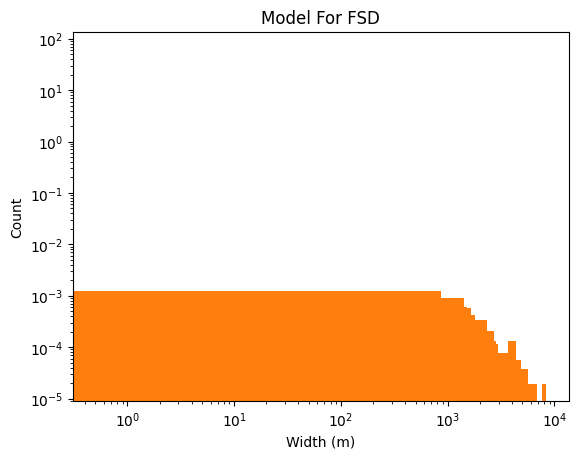

In [5]:
import numpy as np

sizes = list(fsd_dict.keys())
counts = list(fsd_dict.values())
total_count = sum(counts)

# result in a separate variable
result = [x/total_count for x in counts]

result
     

d = {'sizes': sizes, 'fraction': counts}
ice = pd.DataFrame(data=d)

plt.bar(sizes, counts, width = 0)
plt.xlabel("Width (m)")
plt.ylabel("Count")
plt.title("Model For FSD")
plt.yscale("log")
plt.xscale("log")
count, bins, ignored = plt.bar(sizes, result, 700)


## Other Model (not equal probability)

In [6]:
# Start with a normal distribution for the original floe sizes
# with mean = 3,400 meters...?
# size = 500

data = normal(loc=3400, scale=925, size=1000)

fsd2 = data.tolist()

#count, bins, ignored = plt.hist(data, 30)
#plt.show()


In [7]:
# Set Parameters For:
# 0. Fracture Rate
rfrac2 = .7
# 1. Weld Rate
rweld2 = .2
# 2. No event (1- (Weld+Fract))
rnone2 = .1

# Pick a random event to occurr based on the probability of
# Each happening

sampleList = [0, 1, 2]

# list of random events, where num is how many events to pick
def random_event2(num):
    randomList = random.choices(
      sampleList, weights=(rnone2, rfrac2, rweld2), k=num)
    return(randomList)


def pick_floe(fsd):
    randomPick = random.choices(
      list(fsd.keys()), weights=(list(fsd.values())), k=1)
    return randomPick[0]

pick_floe(fsd_dict)



239.625

In [8]:
# add original normal distribution values to the dictionary


def fsd_function():
    # first make a dictionary of a fsd (from normal distribution)
    fsd_dict2 = {}
    data = normal(loc=3400, scale=925, size=1000)
    fsd2 = data.tolist()
    
    for value in fsd2:
        if round(value) in fsd_dict2:
            fsd_dict2[round(value)] += 1
        else:
            fsd_dict2[round(value)] = 1

# this value is for the weld loop
    opt_out = 0

# THIS MODEL IS ASSUMING THE PROBABILITY OF CHOOSING A SIZE IS BASED ON AMOUNT 

    events = random_event2(8000)
    for val in events:
        # define all the possible sizes
        keys = list(fsd_dict2.keys())
        sizes =[]
        for item in keys:
            if fsd_dict2[item] > 0:
                sizes.append(item)
    
        if val == 0:
            continue
        if val == 1:   # Fracture occurs
            # choose a place to break 
            # Randomly chose a place to have a fracture
            # and Randomly choose how many it will break in to (4, 16?)

            choice = float(pick_floe(fsd_dict2))
            options = [4,16]
            split = float(random.choice(options))
            if split == 4:    
                new_size = choice/2
        
        # remove 1 from the bigger value and add 4 to the broken value
                fsd_dict2[choice] -= 1
            
                if new_size in fsd_dict2:
                    fsd_dict2[new_size] += 4
                else:
                    fsd_dict2[new_size] = 4
                
            if split == 16:
                new_size = choice/4
                fsd_dict2[choice] -= 1
                if new_size in fsd_dict2:
                    fsd_dict2[new_size] += 16
                else:
                    fsd_dict2[new_size] = 16


        if val == 2:   # Weld occurs
            # choose a place to weld
            # OR Randomly choose a place to have a weld and randomly choose
            # how many pieces will weld together (4-16?)
            choice = float(pick_floe(fsd_dict2))

            
            if fsd_dict2[choice] < 4:
                # check and see how many there are in our choice
                choice_total = fsd_dict2[choice]
            
                # see how many floes we need
                needed_floes = (4 - choice_total)
            
                for i in range(20):
                    if opt_out == 1:
                        continue
                
                # check if a sligtly larger floe is available to weld 
                    if (choice + i) in fsd_dict2 and fsd_dict2[(choice + i)] > 0:
                        if fsd_dict2[choice + i] >= needed_floes:
                            fsd_dict2[choice + i] -= needed_floes
                            fsd_dict2[choice] = 0
                            opt_out = 1
                    
                    # change the vals in the dictionary
                            if needed_floes >=3:
                                new_size = (choice + i)*2
                                if new_size in fsd_dict2:
                                    fsd_dict2[new_size] += 4

                                else:
                                    fsd_dict2[new_size] = 4
                            else: 
                                new_size = (choice + i)+ choice
                                if new_size in fsd_dict2:
                                    fsd_dict2[new_size] += 4

                                else:
                                    fsd_dict2[new_size] = 4
    return fsd_dict2
# the output of this function is a dictionary of the fsd



## Finding averages

In [55]:
for i in range(3):
    print(i)

0
1
2


In [56]:
# Binning Function

def binning(dictionary, binsize):
    binned = {}
    sizes = []
    for i in range(50):
        if i != 0:
            sizes.append(i*binsize)
    for size in sizes:
        binned[size] = 0
        
    for value in dictionary:
        floe_count = dictionary[value]
        opt_out = 0
        for size in sizes:
            if opt_out == 1:
                continue
            elif value < size and value > 0:
                binned[size] += floe_count
                opt_out = 1
                
        
    return binned

In [52]:
def fsd_trials(trial_amount, binsize):
    
    averages = {}
    for i in range(trial_amount):
        # calls fsd function to get a dict
        fsd = fsd_function()
        for value in fsd:
            if value in averages:
                averages[value].append(fsd[value])
            else:
                averages[value] = []
                averages[value].append(fsd[value])

    for value in averages:
        total = 0
        for number in averages[value]:
            total += number
            averages[value] = total/trial_amount
    
    # binning the trials with binning function
    bin_dict = binning(averages, binsize)
    return bin_dict


In [57]:
trial_dict = fsd_trials(10, 500)

In [77]:
data = pd.DataFrame(
    {'width': list(trial_dict.keys()),
     'count': list(trial_dict.values())}) # load data set


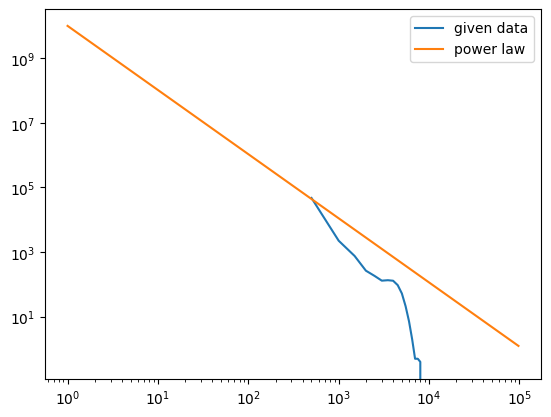

In [76]:
from scipy.optimize import curve_fit

def power_law(x, a, b):
    return a * np.power(x, -b)

width_list = data.iloc[:,0].to_numpy(dtype=float)
count_list = data.iloc[:,1].to_numpy(dtype=float)

plt.loglog(width_list, count_list, label='given data')

popt, pcov = curve_fit(power_law, width_list, count_list, p0=[1, 1], bounds=[[1e-3, 1e-3], [1e10, 20]])

plt.plot(index_list, power_law(index_list, *popt), label='power law')
plt.legend()
plt.show()

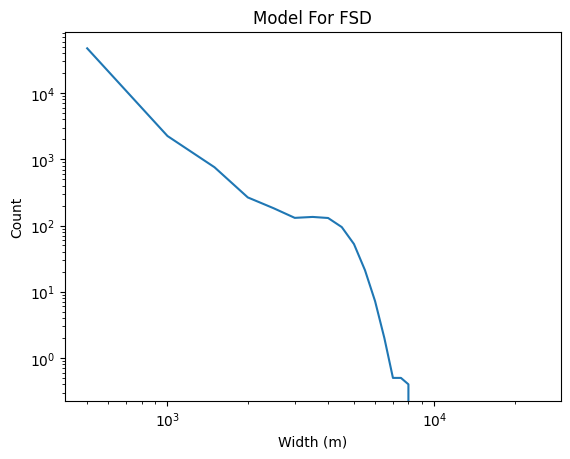

In [78]:
import numpy as np

sizes = list(trial_dict.keys())
counts = list(trial_dict.values())
total_count = sum(counts)


plt.plot(sizes, counts)
plt.xlabel("Width (m)")
plt.ylabel("Count")
plt.title("Model For FSD")
plt.yscale("log")
plt.xscale("log")
#count, bins, ignored = plt.line(sizes, result)


In [18]:
# install by `pip install powerlaw`
import powerlaw
import matplotlib.pyplot as plt

def check_power_law_distribution(size_distribution):
    sizes = list(size_distribution.keys())
    counts = list(size_distribution.values())

    # Fit power law model
    fit = powerlaw.Fit(sizes, xmin=min(sizes))

    # Plot the distribution and power law fit
    fit.plot_ccdf(color='r', linewidth=2)
    fit.power_law.plot_ccdf(color='g', linestyle='--', ax=plt.gca())

    # Perform goodness-of-fit test
    R, p_value = fit.distribution_compare('power_law', 'exponential', normalized_ratio=True)

    if p_value < 0.05:
        print("The size distribution is not a good fit for a power law distribution.", p_value)
    else:
        print("The size distribution is a good fit for a power law distribution.", p_value)

    plt.xlabel('Node Size')
    plt.ylabel('Complementary Cumulative Distribution Function (CCDF)')
    plt.title('Size Distribution and Power Law Fit')
    plt.show()

Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
The size distribution is not a good fit for a power law distribution. 0.002143414208880966


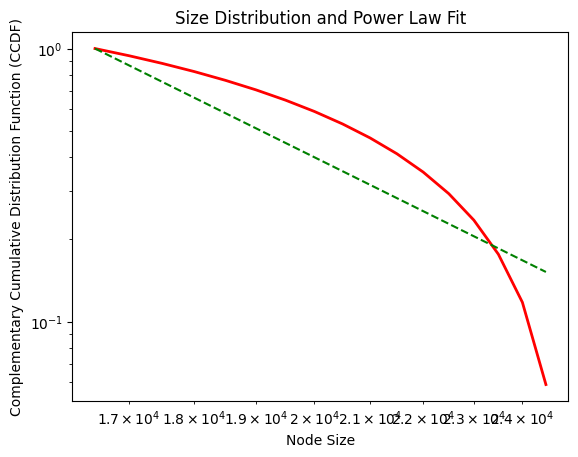

In [19]:
check_power_law_distribution(trial_dict)